

<div align="center">
  <h1>"Análise Exploratória de Dados (AED) na Escolha do Vinho Perfeito"</h1>
</div>


O conjunto de dados que usaremos aqui são os dados de Qualidade do Vinho contendo certas informações sobre vinho tinto e branco.

A qualidade do vinho é baseada em pontuações sensoriais (mediana de pelo menos 3 avaliações feitas por especialistas em vinho). Cada especialista classificou a qualidade do vinho entre 0 (muito ruim) e 10 (muito excelente).

Este conjunto de dados popular é comumente usado para prever se um determinado vinho é de "boa qualidade" ou não.

<div align="center">
  <h1>Carregando bibliotecas - (explicação mais detalhada)</h1>
</div>




1. Esse código em Python importa três bibliotecas populares: 

- NumPy, 
- Pandas e 
- Warnings. 



### NumPy (import numpy as np):

É uma biblioteca fundamental para computação científica em Python.
O NumPy (import numpy as np) significa que você está importando o NumPy e renomeando-o para np para facilitar a referência no código.
NumPy fornece suporte para arrays multidimensionais, funções matemáticas para operações em arrays, álgebra linear, geração de números aleatórios, etc.

### Pandas (import pandas as pd):

É uma biblioteca poderosa para análise e manipulação de dados em Python.
O Pandas (import pandas as pd) importa e renomeia-o como pd para simplificar o código.
Pandas fornece estruturas de dados como DataFrame e Series, que são extremamente úteis para manipulação de dados tabulares e séries temporais.

### Warnings (import warnings e warnings.filterwarnings('ignore')):

A biblioteca Warnings é usada para lidar com avisos gerados pelo Python.
import warnings importa o módulo de avisos.

warnings.filterwarnings('ignore') configura o sistema para ignorar (não exibir) os avisos durante a execução do código. Isso pode ser útil para evitar mensagens que não são essenciais para o usuário e que podem poluir a saída do código.

O uso de warnings.filterwarnings('ignore') é uma prática comum em ambientes de análise de dados para evitar que mensagens de aviso não essenciais sejam exibidas, mantendo o ambiente de trabalho mais limpo e fácil de ler. 

No entanto, é importante estar ciente de que, em algumas situações, ignorar avisos pode ocultar informações importantes sobre o funcionamento do código.

In [2]:
import numpy as np # Pacote fundamental para álgebra linear e matrizes multidimensionais

import pandas as pd # Ferramenta de análise e manipulação de dados

import warnings
warnings.filterwarnings('ignore') # Para ignorar avisos



<div align="center">
  <h1>Carregando dados</h1>
</div>

O módulo Pandas é usado para ler arquivos. Usaremos nossos dados em formato '.csv', e também a função 'read_csv()' para carregar os dados.

Você pode acessar os dados através deste link: https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv

#### Em resumo, este código utiliza o Pandas para carregar dados de um arquivo CSV na forma de um DataFrame, tornando-os acessíveis e manipuláveis para análise de dados no Python.


In [19]:
# Na função read csv(), passamos a localização do arquivo csv.

# Os dados são separados por ';' em vez de ',' - Que é o separador padrão de CSV, então usamos o separador como ';' - (sep = ";")

red_wine_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv", sep = ";")




<div align="center">
  <h1>Técnicas de análise de dados</h1>
</div>





### 1. Head 

Para dar uma olhada mais de perto nos dados, tomamos a ajuda da função ".head()" da biblioteca Pandas, que retorna as cinco primeiras observações do conjunto de dados. Da mesma forma, ".tail()" retorna as últimas cinco observações do conjunto de dados.

Você verá que essa é uma ótima maneira de ter uma sensação inicial de seus dados e talvez entendê-los um pouco melhor já!

In [18]:
# Também podemos passar entre parênteses () a quantidade de registros que queremos.
# Por padrão, ele exibe os primeiros 5 registros.

red_wine_data.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Formato




In [5]:
# Mostra o número total de linhas e colunas no conjunto de dados usando ".shape".

red_wine_data.shape 


(1599, 12)

### Observações:

* O conjunto de dados é composto por 1599 observações (linhas) e 12 características (colunas).
* Das 12, uma é a variável de destino e as restantes 11 são variáveis de entrada.


<div align="center">
  <h1>Obtendo uma visão geral estatística usando a função describe()</h1>
</div>


A função describe() em pandas é muito útil para obter várias estatísticas de resumo. Essa função retorna a contagem, média, desvio padrão, valores mínimo e máximo e os quantis dos dados.

#### AVISO IMPORTANTE: 
Outliers são observações significativamente diferentes de outros pontos de dados

É importante conhecer as características estatísticas básicas de cada variável numérica.

#### Vamos explorar diferentes medidas estatísticas que obtivemos ao descrever().

* count: contagem total de valores não nulos na coluna
* mean: a média aritmética dos valores, ou seja, de todos os valores nessa coluna
* min: o valor mínimo na coluna, ou seja, menor valor na coluna.
* max: o valor máximo na coluna, ou seja, maior valor na coluna.
* 25%: primeiro quartil na coluna depois de organizarmos esses valores em ordem crescente(25% dos dados estão abaixo desse valor)
* 50%: é a mediana ou o segundo quartil, ou seja, valor que divide os dados ao meio
* 75%: terceiro quartil (25% dos dados estão acima desse valor)
* std: desvio padrão, que mede a dispersão dos valores


### Nota: 25%, 50% e 75% nada mais são do que valores percentuais correspondentes

In [6]:
# Pandas exibe uma tabela que contém essas estatísticas para cada coluna numérica no DataFrame.

red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000




### Observações:


* Aqui, como você pode notar, o valor médio é menor do que o valor médio de cada coluna (exceto para qualidade). A Mediana é representada por 50% (percentil 50) na coluna do índice. Isso significa a presença de Outliers. 

Por exemplo, vamos imaginar que um conjunto de dados inclua valores: 2, 4, 6, 30. O valor médio: 10,5 que é menor que a mediana dos dados(5), é muito afetado pelo ponto extremo(30).


* Há notavelmente uma grande diferença entre os valores de 75% e max dos preditores "açúcar residual", "dióxido de enxofre livre", "dióxido de enxofre total". Isso indica que alguns valores dessas 3 variáveis estão muito mais distantes do intervalo geral de valores( até 75º % - topo)


* Assim, as observações 1 e 2 sugerem que existem valores extremos, ou seja, Outliers em nosso conjunto de dados.


<div align="center">
  <h1>Explorando os recursos</h1>
</div>

Variáveis e características são as mesmas, muitas vezes são usadas de forma intercambiável. Todos os nomes de coluna em um conjunto de dados são variáveis.

#### Vamos explorar os recursos/colunas dos conjuntos de dados.

In [7]:
# Você está solicitando ao Pandas para fornecer a lista de nomes das colunas neste DataFrame específico.

red_wine_data.columns 


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Variável de destino:

A variável de destino de um conjunto de dados é o recurso de um conjunto de dados sobre o qual você deseja obter uma compreensão mais profunda. É a variável que é, ou deveria ser a saída.

Aqui a qualidade é a variável alvo, pois estamos tentando saber qual dos dois tipos de vinhos tem melhor qualidade.

 

#### Variáveis de entrada:

As Variáveis de Entrada, as vezes também são chamadas de Variável Preditora.

Em nosso exemplo, as variáveis de entrada são: 'acidez fixa', 'acidez volátil', 'ácido cítrico', 'açúcar residual', 'cloretos', 'dióxido de enxofre livre', 'dióxido de enxofre total', 'densidade','pH', 'sulfatos' e 'álcool'.

Tudo isso nos ajudará a prever a qualidade do vinho.

Depois de carregar os dados, é importante examiná-los. 

Normalmente, não é recomendado lançar diretamente todos os dados no modelo sem entender os dados. Essa etapa sempre ajuda na melhoria do nosso modelo.


<div align="center">
  <h1>Valores únicos de Qualidade (Variável Alvo)</h1>
</div>

In [8]:
# A expressão é utilizada para obter os valores únicos na coluna 'quality' do DataFrame red_wine_data

red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Observações:

Alguns insights importantes apenas olhando para a variável de destino são os seguintes:

1. Neste exemplo, os valores únicos na coluna 'quality' são 5, 6, 7, 4, 8 e 3. 

Isso indica que a qualidade dos vinhos é avaliada em seis níveis diferentes.

2. Essa informação pode ser útil para análise exploratória de dados, pois fornece uma compreensão rápida dos diferentes valores que uma variável categórica pode assumir.

3. A variável alvo/variável dependente é discreta e categórica por natureza.

4. A escala de pontuação "qualidade" varia de 1 a 10. (1 sendo pobre e 10 sendo o melhor.) 


5. As classificações de qualidade 1, 2, 9 e 10 não são dadas por nenhuma observação. 

#### Apenas os escores obtidos estão entre 3 e 8




<div align="center">
  <h1>Contagens de frequência de cada valor de qualidade</h1>
</div>

In [9]:
# A expressão é usada para contar o número de ocorrências de cada valor único na coluna 'quality' do DataFrame red_wine_data

red_wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Observações:

* A saída será uma série que mostra a contagem de cada valor único na coluna 'quality'. Cada valor único na coluna 'quality' será listado com a quantidade de vezes que aparece nos dados.
* Isso nos informa a contagem de votos de cada pontuação de qualidade em ordem decrescente.
* "quality" tem a maioria dos valores concentrados nas categorias 5, 6 e 7.
* Apenas algumas observações foram feitas para as categorias 3 e 8.

Neste exemplo, a coluna 'quality' possui seis valores únicos (6, 5, 7, 4, 8, 3). A contagem de ocorrências de cada valor é mostrada ao lado deles. 

Por exemplo, o valor 6 aparece 638 vezes, o valor 5 aparece 681 vezes, e assim por diante.

Esse tipo de análise é útil para entender a distribuição dos dados em uma variável categórica, como a qualidade dos vinhos, permitindo uma visão mais detalhada da frequência de cada categoria.

<div align="center">
  <h1>Renomeando colunas</h1>
</div>

Vamos renomear as colunas que contêm espaços em seus nomes e substituir os espaços por sublinhados.

In [10]:
red_wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid': 'citric_acid', 'volatile acidity': 'volatile_acidity', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'},
                      
inplace = True)

<div align="center">
  <h1>Verificando valores ausentes</h1>
</div>

Lidar com valores ausentes é uma parte essencial do processo de limpeza e preparação de dados, porque quase todos os dados na vida real vêm com alguns valores ausentes.

O Pandas fornece funções isnull(), isna() para detectar valores ausentes. Ambos fazem a mesma coisa.

- **df.isna()** retorna o dataframe com valores booleanos indicando valores ausentes.
- Você também pode optar por usar **notna(), que é exatamente o oposto de isna().**
- **df.isna().any()** retorna um valor booleano para cada coluna. Se houver pelo menos um valor ausente nessa coluna, o resultado será True.
- **df.isna().sum()** retorna o número de valores ausentes em cada coluna

## 1. isna()



In [11]:
red_wine_data.isna()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


## 2. isna().sum()

#### Não há nenhum valor ausente em nenhuma coluna

In [12]:
red_wine_data.isna().sum() 

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. info()

df.info retorna informações sobre o quadro de dados, incluindo os tipos de dados de cada coluna, o número de valores nulos em cada coluna e o uso de memória de todos os dados.

- Número de entradas não nulas em cada coluna 

=> **Non-Null Count**

- Tipo de dados em cada Coluna

=> **Dtype** 

In [13]:
red_wine_data.info() # Resumo conciso do conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Observações:
    
Os dados têm apenas valores flutuantes e inteiros.
Não há valores faltantes

<div align="center">
  <h1>Verificando duplicatas</h1>
</div>


As duplicatas podem ou não afetar a qualidade dos dados. Antes de decidir se eles devem ser removidos, é essencial entender por que eles podem ter ocorrido em primeiro lugar.

As duplicatas podem ser verificadas usando o método **duplicated().**

In [14]:
duplicate_entries = red_wine_data[red_wine_data.duplicated()]
duplicate_entries.shape


(240, 12)

## Observações:

São 240 duplicatas. 

As classificações de qualidade para o mesmo vinho e/ou semelhante foram dadas por diferentes provadores de vinho, de modo que há a possibilidade de avaliações semelhantes. 

**Podemos, assim, manter essas duplicatas.**


<div align="center">
  <h1>Técnicas Gráficas</h1>
</div>

Agora que realizamos algumas análises de dados no Wine Dataset, é hora de dar um passo adiante. Nossos cérebros são bons em detectar padrões em imagens. Vamos brincar com diferentes tipos de visualizações de dados!

## Importando bibliotecas de visualização de dados

Primeiro, começamos com a importação de algumas bibliotecas de visualização de dados, como matplotlib e seaborn, que nos permitiriam realizar algumas análises gráficas em menos linhas de código com a ajuda delas. 

Um trecho do código pode ser encontrado abaixo.

In [20]:
# Importando bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns


O código que você forneceu importa duas bibliotecas populares para visualização de dados em Python: matplotlib.pyplot e seaborn. Vamos explicar cada uma delas:

**1. Matplotlib.pyplot:**

- matplotlib é uma biblioteca amplamente utilizada para criação de gráficos e visualizações em Python.
- matplotlib.pyplot é um módulo específico dentro do Matplotlib que fornece uma interface de estilo de procedimento para a criação de gráficos.
- plt é um alias (apelido) frequentemente utilizado para matplotlib.pyplot para simplificar o código.

**2. Seaborn:**

- seaborn é uma biblioteca de visualização de dados baseada no Matplotlib. Ela fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
- Seaborn é conhecida por sua sintaxe concisa e atraente, além de incluir funcionalidades adicionais em comparação com o Matplotlib.

Em resumo, esse trecho de código está preparando o ambiente para a criação de visualizações de dados, utilizando as funcionalidades oferecidas pelo Matplotlib para gráficos básicos e pela biblioteca Seaborn para gráficos estatísticos mais elaborados e visualmente atraentes. 

Depois de importar essas bibliotecas, você pode utilizar as funções e métodos delas para criar diversos tipos de gráficos, como gráficos de dispersão, histogramas, boxplots, entre outros.


<div align="center">
  <h1>Separar variáveis de entrada e de destino</h1>
</div>

Primeiro, vamos separar as variáveis de entrada e de destino e atribuí-las a X e y, respectivamente, para que possamos acessar diretamente qualquer uma delas quando necessário.

- X agora contém todos os recursos, exceto Qualidade.
- y contém Qualidade.


In [21]:
y = red_wine_data.quality # Define a qualidade como variável alvo (y)
x = red_wine_data.drop('quality', axis = 1) # Todas as colunas, exceto qualidade, são variáveis de entrada (x)



<div align="center">
  <h1>Histograma</h1>
</div>


Os histogramas também usam barras para visualizar dados. Muitas pessoas podem nem perceber que há uma diferença entre um histograma e um gráfico de barras. Eles praticamente parecem os mesmos à distância.

A chave é que um histograma analisa apenas variáveis quantitativas, enquanto um gráfico de barras analisa variáveis categóricas. É por isso que as barras em um histograma são normalmente agrupadas sem espaçamento entre as barras.


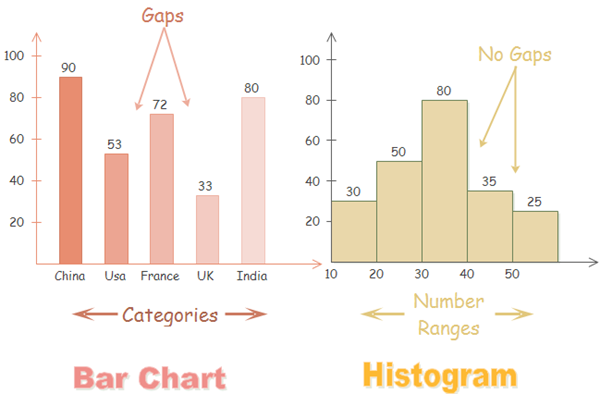

Vamos traçar um histograma agora! 

Ao chamar o método **hist( )** em um DataFrame, você obterá histogramas para todas as Séries.

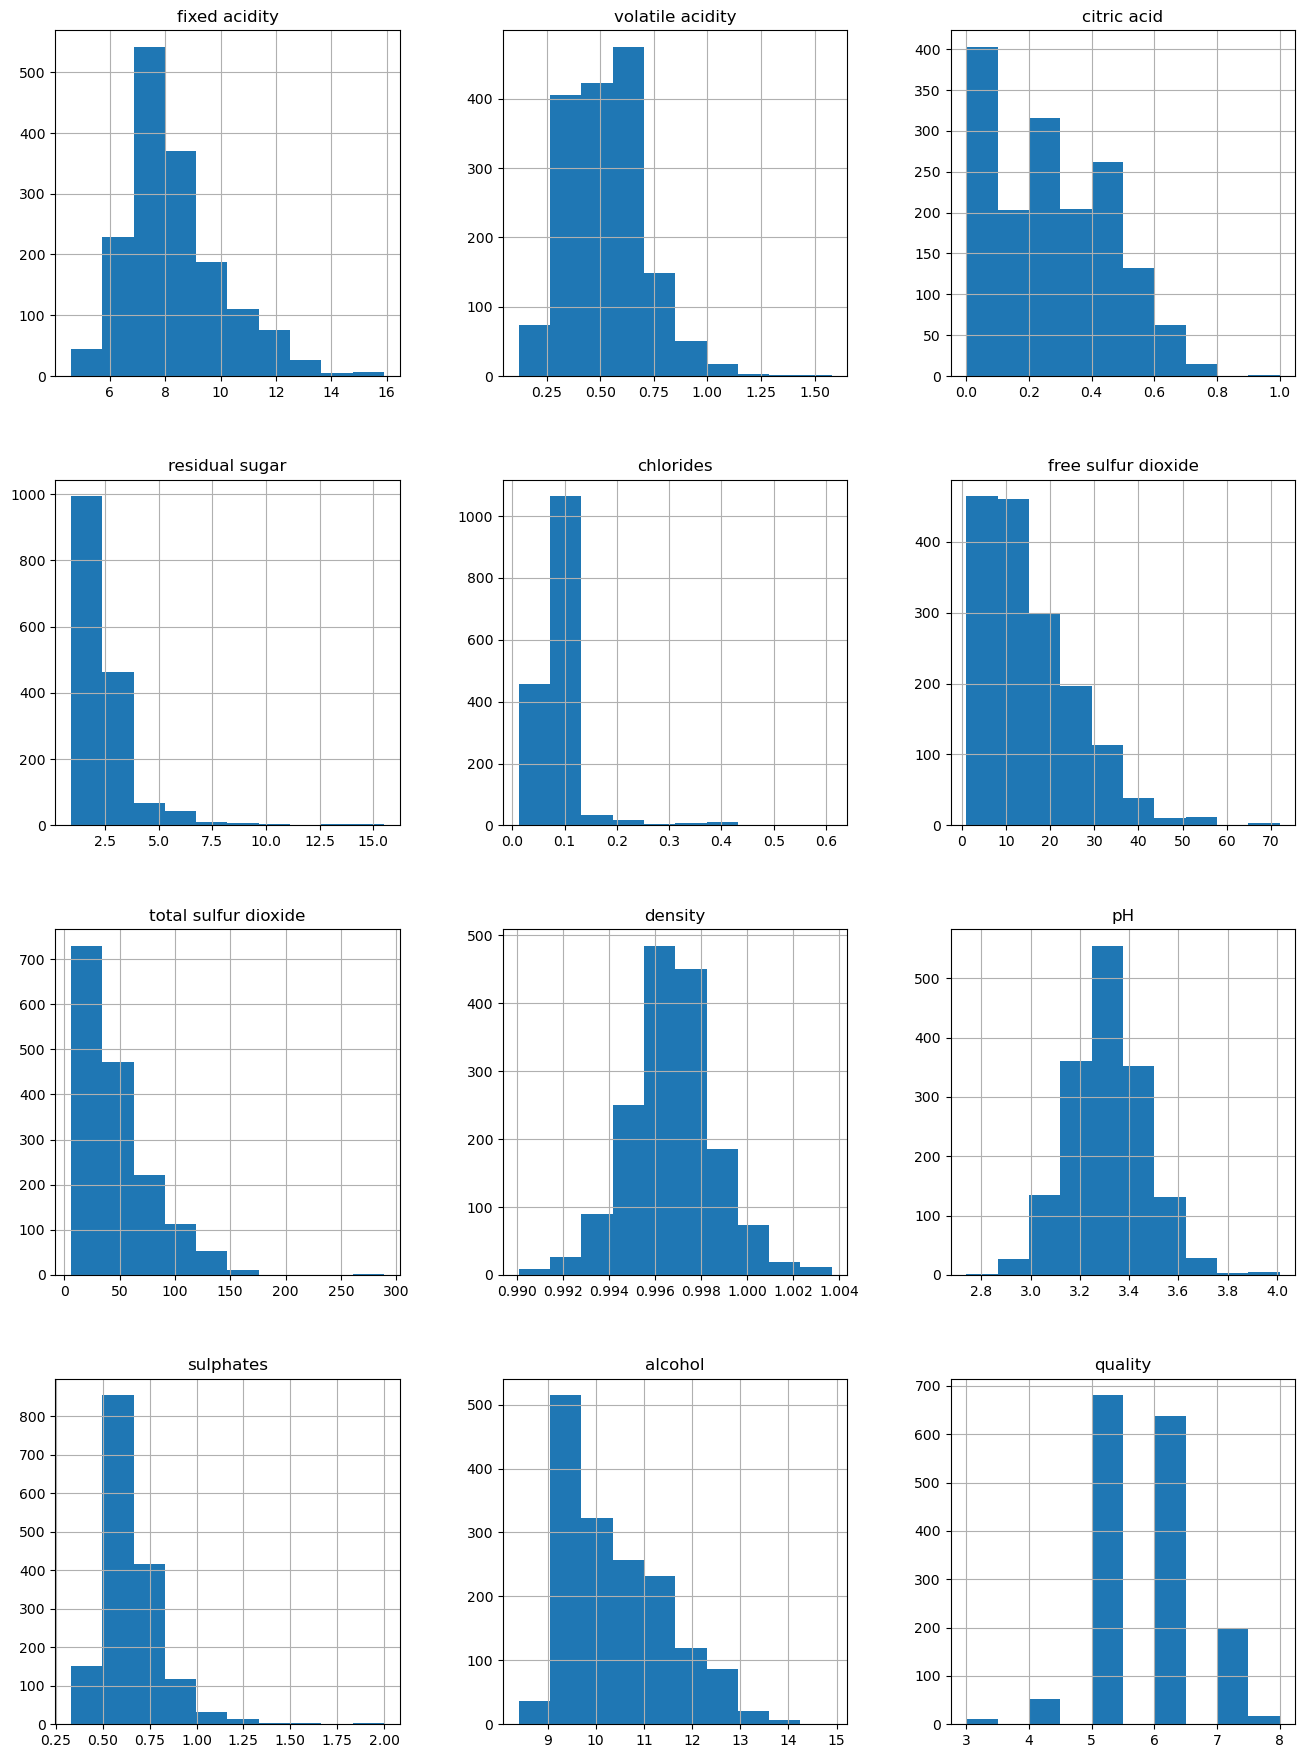

In [22]:
red_wine_data.hist(bins = 10, figsize = (16,22))
plt.show()

# Histograma


- A distribuição do atributo "álcool" parece ser positivamente enviesada, ou seja, a curva é deslocada para a esquerda.
- Os atributos 'densidade' e 'pH' são normalmente distribuídos.
- Olhando agora para o atributo qualidade, podemos observar que os vinhos com qualidade média (exemplo: classificação de qualidade 5 a 7) são superiores aos vinhos com má (1-4) ou boa qualidade (8-10).


## Agora, vamos explicar o que cada linha faz:

1. **import matplotlib.pyplot as plt:** Importa a biblioteca de visualização de dados Matplotlib e a apelida como plt para facilitar o uso.

2. **import seaborn as sns:** Importa a biblioteca Seaborn, que é frequentemente usada em conjunto com o Matplotlib para visualizações mais atraentes.

3. **red_wine_data.hist(bins=10, figsize=(16, 22)):** Cria histogramas para as colunas do DataFrame red_wine_data. 

Os parâmetros informados são:

- bins=10: Especifica o número de intervalos (caixas) no histograma.
- figsize=(16, 22): Define o tamanho da figura em polegadas.

4. **plt.show():** Exibe o gráfico na tela. Essa linha é necessária para mostrar o resultado da visualização.

Portanto, o código está gerando histogramas para as colunas do DataFrame red_wine_data com 10 bins e exibindo o gráfico na tela. Certifique-se de que a variável red_wine_data é um DataFrame válido antes de executar esse código.




<div align="center">
  <h1>Matriz de Correlação com Mapa de Calor</h1>
</div>


### Correlação:

A correlação é uma medida estatística. A correlação de dados é uma maneira de entender a relação entre vários valores ou recursos em seu conjunto de dados.

Todo projeto de ciência de dados bem-sucedido gira em torno de encontrar correlações precisas entre as variáveis de entrada e de destino. No entanto, mais do que muitas vezes, supervisionamos como a análise de correlação é crucial.

Recomenda-se realizar análise de correlação antes e depois das fases de coleta e transformação de dados de um projeto de ciência de dados.

Existem três tipos diferentes de correlações:

1. *Correlação Positiva:* Duas características (variáveis) podem ser positivamente correlacionadas entre si. Isso significa que quando o valor de uma variável aumenta, o valor da(s) outra(s) variável(is) também aumenta (também diminui quando a outra diminui).
Eg. Quanto mais tempo você passar correndo em uma esteira, mais calorias você queimará.

2. *Correlação Negativa:* Duas características (variáveis) podem ser negativamente correlacionadas entre si. Isso ocorre quando o valor de uma variável aumenta e o valor de outra(s) variável(is) diminui (inversamente proporcional).
Eg. À medida que o tempo fica mais frio, os custos com ar condicionado diminuem.

3. *Sem correlação:* Dois recursos podem não ter nenhuma relação um com o outro. Isso acontece quando o valor de uma variável é alterado, então o valor da outra variável não é afetado.
   
*Exemplo:* Não há relação entre a quantidade de chá bebido e o nível de inteligência.

- Cada um desses tipos de correlação existe em um espectro representado por valores de -1 a +1, onde características de correlação positiva leve ou alta podem ser como 0,5 ou 0,7.
  
- Uma correlação positiva muito forte e perfeita é representada por um escore de correlação de 0,9 ou 1.

- Se houver uma forte correlação negativa, ela será representada por um valor de -0,9 ou -1. 

Valores próximos a zero indicam ausência de correlação.

Podemos verificar como cada recurso está relacionado a outros usando a função corr().

In [23]:
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
